![](https://imagizer.imageshack.com/v2/320x240q90/922/ebQruz.png)


# Data Science Challenge  

## Part 1: Experiment design

### Background

In 2011 AirBnB ran some experiments which showed that when a property featured professional photography, users were much more likely to trust the property and consequently make a booking. So, AirBnB a launched free professional photography service for all hosts. From inside the listing page, hosts were able to click a link to view more about the service, request a professional photographer, and subsequently (after the photo shoot) have their property profile updated with professional photos.

The project initially proved to be a success:

Guests were more likely to book a property that had professional photography
Hosts were able to charge more for listings with professional photos
However, over time this also became a multimillion dollar operation and a challenge to manage across over 200 countries.

Fast forward to 2016, and some new developments have also helped with building trust:

- 2013: Launch of identity verification for hosts and guests
- 2014: Launch of double blind reviews (neither host nor guest can see the other’s review), ensuring more honest reviews of properties and hosts.
- 2015: Huge global PR lift for AirBnB, raising the profile of the company
An additional interesting development has also been the proliferation of smartphones with powerful and high-quality cameras (+apps) over the last few years, which has made it more possible for hosts to take good quality photos of their property. There is also the opinion that perhaps millennials have come to expect smartphone photos as the norm and are less likely to expect professional photography.

### Challenge

Since the professional photography service consumes so many operational and financial resources, AirBnB management are unsure if they should continue. AirBnB management have asked the Data Science team to analyse the impact of the professional photography service in order to determine whether or not they should continue funding the service.

1. Provide full details about how you will run experiments to assess the impact of this service on both hosts and guests. How will you ensure that the experiments are valid and not biased?

### Solution

So, we are interested in perform an **A/B test** to analyse whether AirBnB should continue funding this service or not.
To do so, we run an experiment consisting on comparing how booking rate varies if professional photos are shown instead of particular ones for the same apartments. 
We can run a **statistical hypothesis test** to verify if booking rate have the same behavior for both choices. We can assume than professional photos have always better or equal performance than no professional ones, so we define a **one-tailed** test:

  >***H***<sub>0</sub> : Booking rate<sub>no professional</sub> = Booking rate<sub>professional</sub>  
  >***H***<sub>1</sub> : Booking rate<sub>no professional</sub> < Booking rate<sub>professional</sub>

We can proceed by offering the professional service to certain users. For the apartments whose owners agree to hire this service, two versions of the same page is displayed at random to the visitor: the control group will see old photos, and the experiment group will see new proesional photos for a certain period of time. The only change a user will see will be the pictures. Ranking, descriptions, reviews and page appearence will keep the same for both groups.  


For those hosts who agree to request a professional photographer, traffic who visit the property will be divide into two groups (50%-50%):   
- **Control group**: guests on this group will see no professional photos
- **Test group**: guests on this group will see professional photos

We will maintain this division for two weeks and the only change the guest should see in the listing page is the photo (professional or not). Everything else must remain the same for both groups.

### How to ensure that the experiment is valid:  
- Experiments for A/B test are usually running for a minimum of one to two weeks. By doing so, you would have covered all the different days which visitors interact with the website and make sure we do not introduce bias based on day of the week. Experiment will be launched for web, mobile and app to cover all visitor's segments.
- In order to constrain the experiment's results we launch the experiment in one city, and after two weeks, and based on the results, we can decide if it should be launched in other cities. Also we have to keep in mind which city can assume a possible negative impact on their bookings.
- The sample of properties should be cover listings with different sizes, number of rooms/bathrooms, location, price, neighborhood,... so we make sure that results are not biased for certain property features.


### Users tracking and BR definition

We need to define a metric that let us to know which percentage of visitors finally make a booking request. In addition, we will only count **one visit per user**, even if the user makes several visits to the property page.  
To ensure that we correctly track each user, we will identify them by their unique **user** ***id***, so even if they use a different device than the one they used on their first visit, we will still detect them and we will avoid some users in control and test group at the same time. Therefore, for our experiment we will only take into account those users who have a registered account on the website.  
So, we can define the **booking rate** as the following ratio:

**BR** = number of bookings / number of unique visitors

We assume this metric verifies:
- Continuous.
- Approximately normally distributed.
- Doesn't contain any outliers.

### Running the experiment

Our samples are dependent; that is, there is only one sample that has been tested twice (once per group) so we will run this test as a paired A/B test. First of all, we need to define the sample size to run the test. To do this, we set (with usual values) the **significance level** ($\alpha$=0.05), the **power of the test** (1-$\beta$=0.8) where $\alpha$, $\beta$ are the probability of Type I error and Type II error respectively, and the expected **effect size** ($\Delta$=0.2). 
And we can plot the power of the test as a function of the sample size, and select those N than correspond to 0.8 of power, using the following formula:

N = ((Z<sub>1-$\alpha$</sub> + Z<sub>1-$\beta$</sub>) / $\Delta$)<sup>2</sup>

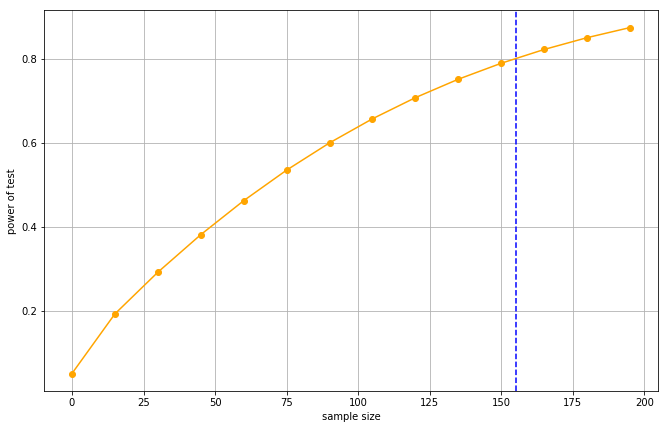

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,7))
sample = np.arange(200, step=15)
plt.plot(sample,norm.cdf(.2*np.sqrt(sample)-norm.ppf(.95)), '-o', color='orange')
plt.xlabel('sample size')
plt.ylabel('power of test')
plt.axvline(x=155, color='b', linestyle='--')
plt.style.use('ggplot')
plt.grid(True)
plt.show()

In [2]:
print('N = %.2f' %((norm.ppf(.95)+norm.ppf(.8))/.2)**2)

N = 154.56


As we can see in the plot, if we want to reach a power of 80% we need a sample with **155 listings** (tested twice)

We can also plot the power of the test as a function of the effect size for several values of *N*

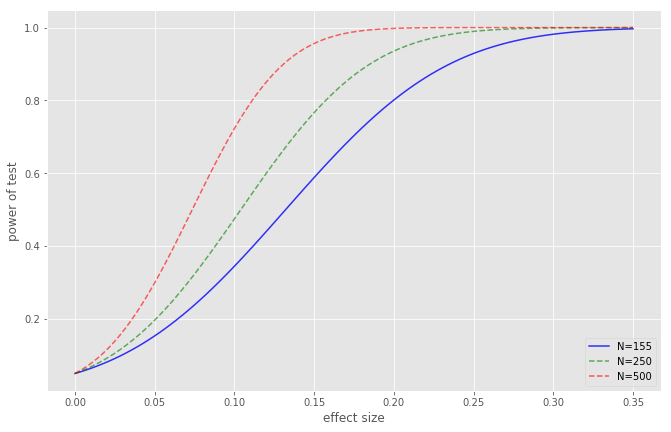

In [3]:
fig = plt.figure(figsize=(11,7))
effect_size=np.linspace(0,.35,100)
plt.plot(effect_size,norm.cdf(effect_size*np.sqrt(155)-norm.ppf(.95)), color='blue', alpha=.8)
plt.plot(effect_size,norm.cdf(effect_size*np.sqrt(250)-norm.ppf(.95)), color='green', alpha=.6, linestyle='--')
plt.plot(effect_size,norm.cdf(effect_size*np.sqrt(500)-norm.ppf(.95)), color='red', alpha=.6, linestyle='--')
plt.xlabel('effect size')
plt.ylabel('power of test')
plt.legend(['N=155', 'N=250', 'N=500'], loc='lower right')
plt.grid(True)
plt.show()

Looking at the graph, we can see that the larger the sample, the smaller the effect we can detect for a test power of 80%

### Analyzing the results

After running the experiment for two weeks we have to analyze the results. First, we need to check that all the assumptions we made have been upheld. And then, we will carry out an exploratory analysis in order to check if observations on both groups have similar distribution on their features, such as age, gender, ...
If all checks are right we can calculate **means for booking rate** in both groups and compare them using a **t-test**.   If there is a statistically significant difference we can **reject** the null hypothesis, so listings with professional photos tend to have higher booking rate.

### Next steps

If we reject the null hypothesis, we can run the experiment in other countries and observe if there are some features on these new countries than affect the results and how are their distributions (skewness).
Finally, depend on the time of the year when the experiment was run, we should run it again in other time window to check if exists seasonality on data behavior.

## Part 2: Result analysis

### Background

A ride hailing app currently assigns new incoming trips to the closest available vehicle. To compute such distance, the app currently computes haversine distance between the pickup point and each of the available vehicles. We refer to this distance as linear

However, the expected time to reach A from B in a city is not 100% defined by Haversine distance: Cities are known to be places where huge amount of transport infrastructure (roads, highways, bridges, tunnels) is deployed to increase capacity and reduce average travel time. Interestingly, this heavy investment in infrastructure also implies that bird distance does not work so well as proxy, so the isochrones for travel time from certain location drastically differ from the perfect circle defined by bird distance, as we can see in this example from CDMX where the blue area represents that it is reachable within a 10 min drive.  
In addition to this, travel times can be drastically affected by traffic, accidents, road work…So that even if a driver is only 300m away, he might need to drive for 10 min because of road work in a bridge.

### Proposal

In order to optimise operations, engineering team has suggested they could query an external real time maps API that not only has roads, but also knows realtime traffic information. We refer to this distance as road distance.

In principle this assigment is more efficient and should outperform linear. However, the queries to the maps API have a certain cost (per query) and increase the complexity and reliability of a critical system within the company. So Data Science team has designed an experiment to help engineering to decide

### Experimental design

The designed expirement is very simple. For a period of 5 days, all trips in 3 cities (Bravos, Pentos and Volantis) have been randomly assigned using linear or road distance:

  - Trips whose trip_id starts with digits 0-8 were assigned using road distance
  - Trips whose trip_id starts with digits 9-f were assigned using linear distance


### Challenge

Try to answer the following questions

1. Should the company move towards road distance? What’s the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)
2. How would you improve the experimental design? Would you collect any additional data?


### Solution

In this case, we want to carry out an hypothesis tesis for all cities that let us to know if we should move towards road distance, based on defined metrics.

### Data preprocessing 

First of all, we load the JSON file as pandas dataframe and take a look at data format, size and non-null values

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_json('C:/Users/asus/Desktop/intervals_challenge.json', lines=True)
df.head()

,city_id,distance,duration,started_at,trip_id,type,vehicle_id
0,pentos,5384,857,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,driving_to_destination,52d38cf1a3240d5cbdcf730f2d9a47d6
1,volantis,1248,245,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,going_to_pickup,8336b28f24c3e7a1e3d582073b164895
2,pentos,5847,1249,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,driving_to_destination,8885c59374cc539163e83f01ed59fd16
3,bravos,2585,471,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,going_to_pickup,81b63920454f70b6755a494e3b28b3a7
4,pentos,743,182,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,going_to_pickup,b73030977cbad61c9db55418909864fa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165170 entries, 0 to 165169
Data columns (total 7 columns):
city_id       165170 non-null object
distance      165170 non-null object
duration      165170 non-null object
started_at    165170 non-null datetime64[ns]
trip_id       165170 non-null object
type          165170 non-null object
vehicle_id    165170 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 8.8+ MB


Now, column *started_at* is in Timestamp format so we can analyze it. We also create a new column from trip_id, indicating if trip has been assigned using road or linear distance, looking at the first character in the string: 

In [6]:
df['experiment'] = df.trip_id.apply(lambda x: 'road' if x[0] in list(map(str, range(9))) else 'linear')

We can see how many unique trips have each type, and observe that there is no one-to-one correspondence:

In [7]:
df.groupby('type').agg({'trip_id':'nunique'})

,trip_id
type,
driving_to_destination,52914
going_to_pickup,58468
waiting_for_rider,53744


We can check that not all trips has gone through the three states uniquely, mainly because extracted data could have captured some unfinished rides. So we are only interested on trips that go through main three types just one time:

In [8]:
d1 = df.groupby('trip_id').agg({'type':'nunique'}).reset_index()
d1.groupby('type').size().reset_index().rename(columns={'type':'distinct_types', 0:'trips'})

,distinct_types,trips
0,1,4945
1,2,1042
2,3,52699


In [9]:
types3 = d1.loc[d1.type==3].trip_id.unique()

We want to optimize time to reach the pick-up point, sowe only consider vehicle intervals of type ***going_to_pickup***

### Missing values and outliers

There are no missing values but some vehicles intervals have value 'NA' (string non-null) in distance and duration columns, so we have to clean them and cast to integer:

In [10]:
df2 = df.loc[(df.distance !='NA') & (df.duration !='NA')]
df2.loc[:, 'duration'] = df2.loc[:, 'duration'].astype(int)
df2.loc[:, 'distance'] = df2.loc[:, 'distance'].astype(int)
df2.shape

c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(164013, 8)

We can obtain an overview of duration and distance distribution, those values greater than ***Q<sub>3</sub> + 1.5 x InterquartileRange*** will be considered **outliers**.

,duration,distance
count,164013.000000,1.640130e+05
mean,432.959534,1.944164e+03
std,559.097970,7.230917e+03
min,0.000000,0.000000e+00
25%,55.000000,1.900000e+01
50%,246.000000,6.080000e+02
75%,616.000000,2.349000e+03
max,48654.000000,1.218089e+06


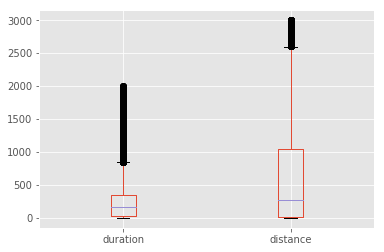

In [11]:
bx1 = df2.loc[(df2.duration<2000) & (df2.distance<3000)].boxplot(column=['duration', 'distance'])
df2[['duration', 'distance']].describe()

### Metric definition

We need to define a metric that tells us which is the closest driver to the rider (road distance), but not only by the distance, because traffic conditions can alter the duration and make a driver who is farther away arrive earlier.
So, we can define **speed** (distance/duration) as metric to achieve this, cleaning those vehicle intervals with duration=0 before analysing the problem. 

In [12]:
df2.loc[(df2.duration==0) & (df2.type=='going_to_pickup')].shape

(22, 8)

We need to check if it is legimit to compare between the two diferent groups of measures, road and linear.

To do so, we need to analyse if the split made in order to assign a distance is biased or not, comparing distributions across other control variables, regardless of the split. For example, imagine that linear distance has been assigned more on peak hours, and road has been assigned more during off-peak hours. This would probably lead to road speed is greater than linear, when it is not comparable.

We only have data for almost 32 hours (from 2016-10-03 13:00:00 to 2016-10-04 20:36:20). To study if distribution is comparable between the two groups, we can plot the number of rides per hour for each of groups, for the three cities:


### Temporal series analysis

Before starting the exploratory analysis of the data we need to check that the samples for the two types of experiment are comparable and are not biased by the time slot in which the ride is assigned or maybe another control variables.

We only have data for almost 32 hours (from 2016-10-03 13:00:00 to 2016-10-04 20:36:20). To study if distribution is comparable between the two groups, we can plot the number of rides per hour for each of groups, for the three cities:

In [13]:
hourly = df2.loc[(df2.duration>0) & (df2.type=='going_to_pickup') & (df2.trip_id.isin(types3))]
hourly.loc[:, 'started_at'] = pd.to_datetime(hourly.loc[:, 'started_at'])
hourly.head()

,city_id,distance,duration,started_at,trip_id,type,vehicle_id,experiment
1,volantis,1248,245,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,going_to_pickup,8336b28f24c3e7a1e3d582073b164895,road
3,bravos,2585,471,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,going_to_pickup,81b63920454f70b6755a494e3b28b3a7,linear
4,pentos,743,182,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,going_to_pickup,b73030977cbad61c9db55418909864fa,road
5,volantis,1351,599,2016-10-03 13:00:02.154000044,158e7bc8d42e1d8c94767b00c8f89568,going_to_pickup,126e868fb282852c2fa95d88878686bf,road
9,bravos,2674,1525,2016-10-03 13:00:05.637000084,d3e6e8fb50c02d66feca2c60830c4fcc,going_to_pickup,b0906e917dc5cc0bcba190fd80079a74,linear


We need to calculate how many trips are made per hour, so we group unique trips by day and hour:

In [14]:
hourly.loc[:,'day'] = hourly.started_at.dt.day
hourly.loc[:,'hour'] = hourly.started_at.dt.hour
hourly.loc[:,'month'] = hourly.started_at.dt.month
hourly.loc[:,'year'] = hourly.started_at.dt.year


c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [15]:
a1 = pd.DataFrame(pd.to_datetime(hourly[['year', 'month', 'day', 'hour']]))
a1 = a1.drop_duplicates().reset_index(drop=True)
a1 = a1.rename(columns={0:'date'})

b_linear=hourly.loc[(hourly.city_id=='bravos')&(hourly.experiment=='linear')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})
b_road=hourly.loc[(hourly.city_id=='bravos')&(hourly.experiment=='road')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})

p_linear=hourly.loc[(hourly.city_id=='pentos')&(hourly.experiment=='linear')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})
p_road=hourly.loc[(hourly.city_id=='pentos')&(hourly.experiment=='road')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})

v_linear=hourly.loc[(hourly.city_id=='volantis')&(hourly.experiment=='linear')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})
v_road=hourly.loc[(hourly.city_id=='volantis')&(hourly.experiment=='road')].groupby(['day', 'hour']).agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'trips'})

k1 = pd.concat([a1,b_linear[['trips']]],axis=1)
k1 = k1.set_index('date')
k2 = pd.concat([a1,b_road[['trips']]],axis=1)
k2 = k2.set_index('date')

k3 = pd.concat([a1,p_linear[['trips']]],axis=1)
k3 = k3.set_index('date')
k4 = pd.concat([a1,p_road[['trips']]],axis=1)
k4 = k4.set_index('date')

k5 = pd.concat([a1,v_linear[['trips']]],axis=1)
k5 = k5.set_index('date')
k6 = pd.concat([a1,v_road[['trips']]],axis=1)
k6 = k6.set_index('date')

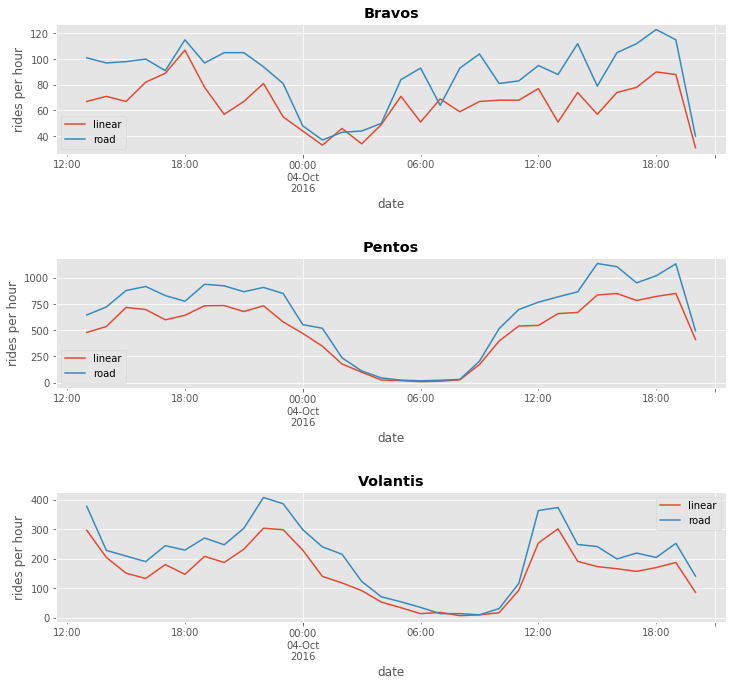

In [16]:
fig = plt.figure(figsize=(12,11))

plt.subplot(311)
k1.trips.plot()
k2.trips.plot()
plt.ylabel('rides per hour')
plt.legend(['linear', 'road'])
plt.grid(True)
plt.title('Bravos', fontweight='bold')

plt.subplot(312)
k3.trips.plot()
k4.trips.plot()
plt.ylabel('rides per hour')
plt.legend(['linear', 'road'])
plt.grid(True)
plt.title('Pentos', fontweight='bold')

plt.subplot(313)
k5.trips.plot()
k6.trips.plot()
plt.ylabel('rides per hour')
plt.legend(['linear', 'road'])
plt.grid(True)
plt.title('Volantis', fontweight='bold')
plt.subplots_adjust(hspace=.8)
plt.show()


And we can see that, except for Bravos, distribution is almost identical. We can compute it numerically with correlation between road and linear hourly rides for every city:

In [17]:
bravos = pd.concat([b_linear[['trips']],b_road[['trips']]],axis=1)
pentos = pd.concat([p_linear[['trips']],p_road[['trips']]],axis=1)
volantis = pd.concat([v_linear[['trips']],v_road[['trips']]],axis=1)
d = {'city': ['Bravos', 'Pentos', 'Volantis'], 'Pearson corr': [bravos.corr().values[0,1], pentos.corr().values[0,1], volantis.corr().values[0,1]]}
p_corr = pd.DataFrame(data=d)
p_corr = p_corr.set_index('city')
p_corr

,Pearson corr
city,
Bravos,0.808672
Pentos,0.994278
Volantis,0.984827


### Exploratory analysis

Let's see if our metric is well defined. We need to analyze distribution of distance and duration for each city, so we can use box-plot and PDFs graphs to see how asymmetrical their distributions are and how are their outliers, for distance:

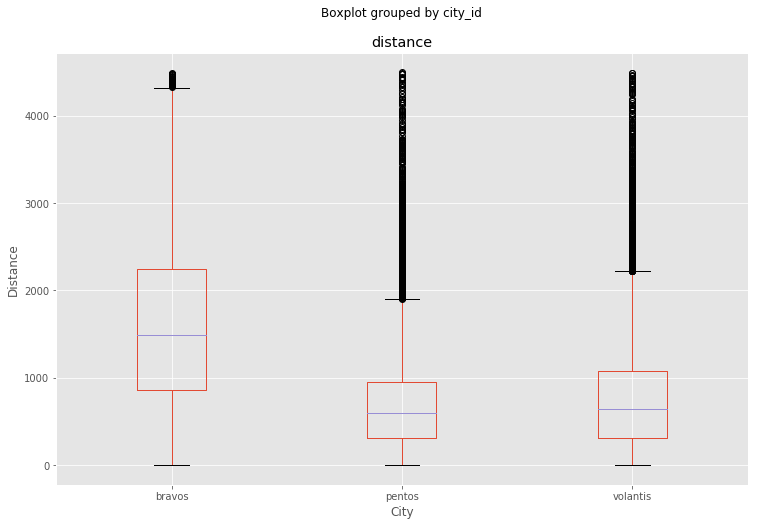

In [18]:
hourly = hourly.drop(columns=['year', 'month', 'day', 'hour'])
hourly.loc[hourly.distance<4500].boxplot(column='distance', by='city_id', figsize=(12,8))
plt.ylabel('Distance')
plt.xlabel('City')
plt.show()

And duration feature:

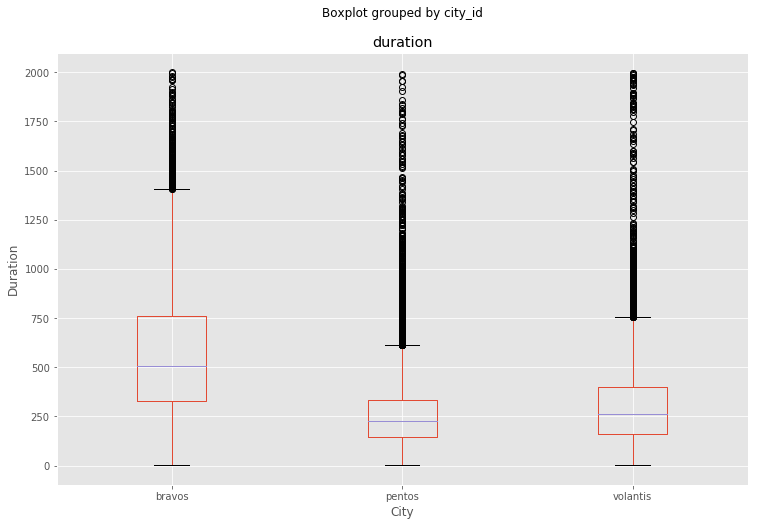

In [19]:
hourly.loc[hourly.duration<2000].boxplot(column='duration', by='city_id', figsize=(12,8))
plt.ylabel('Duration')
plt.xlabel('City')
plt.show()

In [20]:
hourly.groupby('city_id').describe(include=np.number)

distance                                                         \
            count         mean          std  min     25%     50%     75%   
city_id                                                                    
bravos     4887.0  2129.478003  2786.986191  0.0  903.00  1599.0  2452.5   
pentos    36422.0   709.226704   662.327903  0.0  311.00   593.5   953.0   
volantis  11414.0   872.192132  1212.500913  0.0  318.25   647.0  1096.0   

                  duration                                                    \
              max    count        mean         std  min    25%    50%    75%   
city_id                                                                        
bravos    87403.0   4887.0  650.170657  499.806016  3.0  331.0  514.0  788.5   
pentos    45089.0  36422.0  259.704052  185.927272  2.0  144.0  225.0  332.0   
volantis  65492.0  11414.0  337.082092  327.873750  2.0  164.0  264.0  406.0   

                  
             max  
city_id           
bravos    5201.0  
pentos    9441.0  
volantis  4887.0

So, outliers for distance are values greater than:

In [21]:
o1 = 1.5*(hourly.loc[hourly.city_id=='bravos'].distance.quantile(.75)-hourly.loc[hourly.city_id=='bravos'].distance.quantile(.25))+hourly.loc[hourly.city_id=='bravos'].distance.quantile(.75)
o2 = 1.5*(hourly.loc[hourly.city_id=='pentos'].distance.quantile(.75)-hourly.loc[hourly.city_id=='pentos'].distance.quantile(.25))+hourly.loc[hourly.city_id=='pentos'].distance.quantile(.75)
o3 = 1.5*(hourly.loc[hourly.city_id=='volantis'].distance.quantile(.75)-hourly.loc[hourly.city_id=='volantis'].distance.quantile(.25))+hourly.loc[hourly.city_id=='volantis'].distance.quantile(.75)

print('Bravos: {} Pentos: {} Volantis: {}'.format(o1, o2, o3))

Bravos: 4776.75 Pentos: 1916.0 Volantis: 2262.625


And outliers for duration:

In [22]:
o1 = 1.5*(hourly.loc[hourly.city_id=='bravos'].duration.quantile(.75)-hourly.loc[hourly.city_id=='bravos'].duration.quantile(.25))+hourly.loc[hourly.city_id=='bravos'].duration.quantile(.75)
o2 = 1.5*(hourly.loc[hourly.city_id=='pentos'].duration.quantile(.75)-hourly.loc[hourly.city_id=='pentos'].duration.quantile(.25))+hourly.loc[hourly.city_id=='pentos'].duration.quantile(.75)
o3 = 1.5*(hourly.loc[hourly.city_id=='volantis'].duration.quantile(.75)-hourly.loc[hourly.city_id=='volantis'].duration.quantile(.25))+hourly.loc[hourly.city_id=='volantis'].duration.quantile(.75)

print('Bravos: {} Pentos: {} Volantis: {}'.format(o1, o2, o3))

Bravos: 1474.75 Pentos: 614.0 Volantis: 769.0


Now, we ca plot probability density function for both, distance and duration:

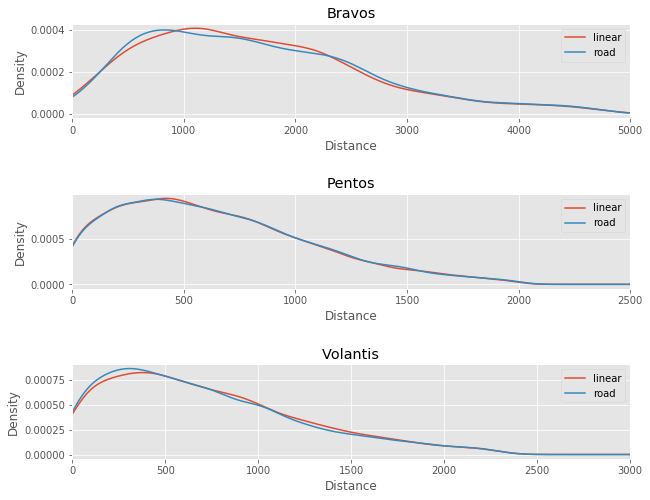

In [23]:
fig = plt.figure(figsize=(10,8))

bravos = hourly.loc[(hourly.city_id=='bravos') & (hourly.distance<=4780)]
plt.subplot(311)
bravos.loc[bravos.experiment=='linear'].distance.plot.kde()
bravos.loc[bravos.experiment=='road'].distance.plot.kde()
plt.title('Bravos')
plt.xlabel('Distance')
plt.legend(['linear', 'road'])
plt.xlim(0,5000)

pentos = hourly.loc[(hourly.city_id=='pentos') & (hourly.distance<=2000)]
plt.subplot(312)
pentos.loc[pentos.experiment=='linear'].distance.plot.kde()
pentos.loc[pentos.experiment=='road'].distance.plot.kde()
plt.title('Pentos')
plt.xlabel('Distance')
plt.legend(['linear', 'road'])
plt.xlim(0,2500)

volantis = hourly.loc[(hourly.city_id=='volantis') & (hourly.distance<=2300)]
plt.subplot(313)
volantis.loc[volantis.experiment=='linear'].distance.plot.kde()
volantis.loc[volantis.experiment=='road'].distance.plot.kde()
plt.title('Volantis')
plt.xlabel('Distance')
plt.legend(['linear', 'road'])
plt.xlim(0,3000)
plt.subplots_adjust(hspace=.8)
plt.show()


And duration:

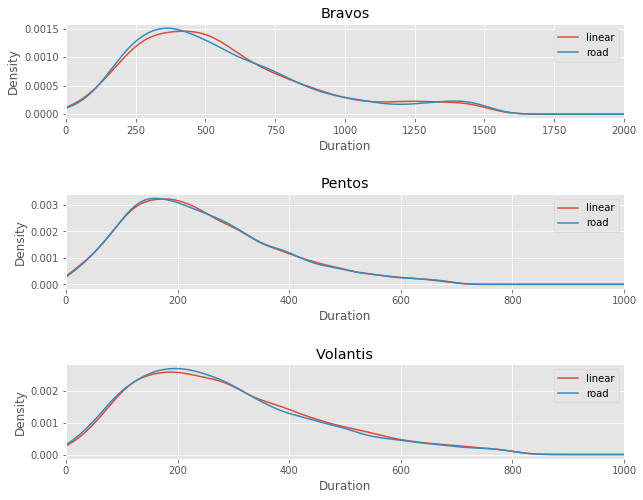

In [24]:
fig = plt.figure(figsize=(10,8))

bravos = hourly.loc[(hourly.city_id=='bravos')& (hourly.duration<1500)]
plt.subplot(311)
bravos.loc[bravos.experiment=='linear'].duration.plot.kde()
bravos.loc[bravos.experiment=='road'].duration.plot.kde()
plt.title('Bravos')
plt.xlabel('Duration')
plt.legend(['linear', 'road'])
plt.xlim(0,2000)

pentos = hourly.loc[(hourly.city_id=='pentos')& (hourly.duration<700)]
plt.subplot(312)
pentos.loc[pentos.experiment=='linear'].duration.plot.kde()
pentos.loc[pentos.experiment=='road'].duration.plot.kde()
plt.title('Pentos')
plt.xlabel('Duration')
plt.legend(['linear', 'road'])
plt.xlim(0,1000)

volantis = hourly.loc[(hourly.city_id=='volantis')& (hourly.duration<800)]
plt.subplot(313)
volantis.loc[volantis.experiment=='linear'].duration.plot.kde()
volantis.loc[volantis.experiment=='road'].duration.plot.kde()
plt.title('Volantis')
plt.xlabel('Duration')
plt.legend(['linear', 'road'])
plt.subplots_adjust(hspace=.8)
plt.xlim(0,1000)
plt.show()

We can observe that Bravos drivers go further and trips are longer than Pentos and Volantis (maybe because there are less cars in Bravos than in the others cities). Both distance and duration distributions over *experiment* are similar.

If we scatter plot distance vs duration we can see how the variables are related and the atypical data:

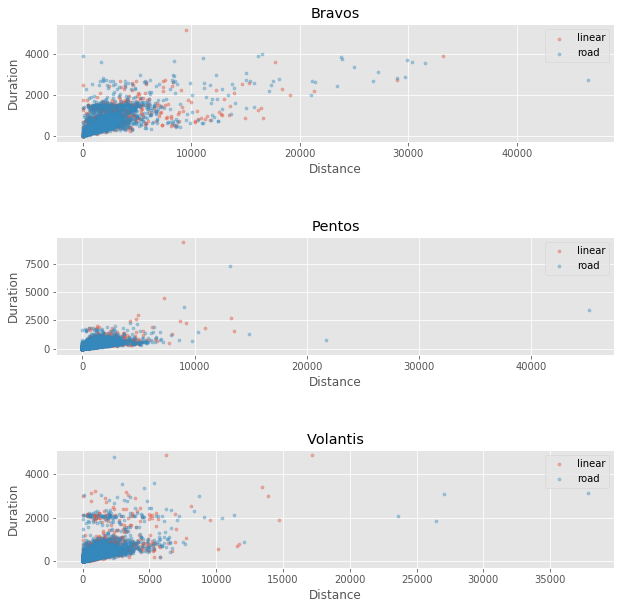

In [25]:
fig = plt.figure(figsize=(10,10))

groups1 = hourly.loc[(hourly.city_id=='bravos') & (hourly.distance<=50000)].groupby('experiment')

plt.subplot(311)

for name, group in groups1:
    plt.scatter(group.distance, group.duration, label=name, alpha=.4, s=10) 
plt.title('Bravos')
plt.legend(['linear', 'road'])
plt.xlabel('Distance')
plt.ylabel('Duration')
 
plt.subplot(312)
groups2 = hourly.loc[(hourly.city_id=='pentos') & (hourly.distance<=50000)].groupby('experiment')

for name, group in groups2:
    plt.scatter(group.distance, group.duration, label=name, alpha=.4, s=10)  

plt.title('Pentos')
plt.legend(['linear', 'road'])
plt.xlabel('Distance')
plt.ylabel('Duration')
groups3 = hourly.loc[(hourly.city_id=='volantis') & (hourly.distance<=50000)].groupby('experiment')

plt.subplot(313)

for name, group in groups3:
    plt.scatter(group.distance, group.duration, label=name, alpha=.4, s=10)  
plt.title('Volantis')
plt.legend(['linear', 'road'])
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.subplots_adjust(hspace=.8)
plt.show()

Now, let’s calculate a column with metric speed. We can compare speed distribution between these two groups, and for each city, mean of distribution is plotted with dashed lines:

In [26]:
hourly['speed'] = hourly.distance / hourly.duration

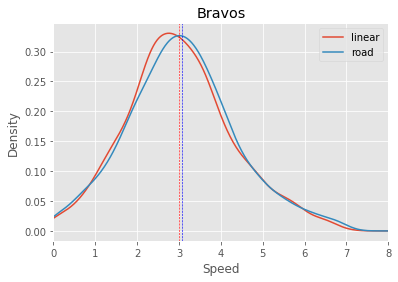

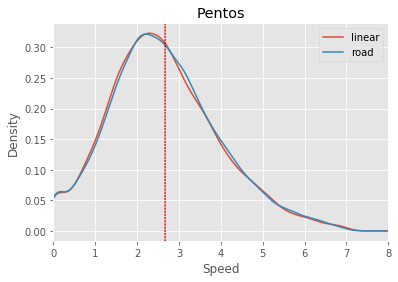

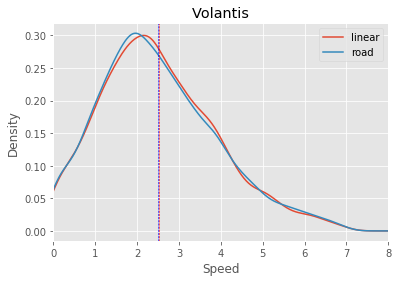

In [27]:
bravos = hourly.loc[(hourly.city_id=='bravos')&(hourly.speed<7)]
bravos.loc[bravos.experiment=='linear'].speed.plot.kde()
bravos.loc[bravos.experiment=='road'].speed.plot.kde()
plt.title('Bravos')
plt.xlabel('Speed')
plt.legend(['linear', 'road'])
plt.xlim(0,8)
plt.axvline(x=3.01, color='r', ls='--', lw=0.6)
plt.axvline(x=3.07, color='b', ls='--', lw=0.6)
plt.show()

pentos = hourly.loc[(hourly.city_id=='pentos')&(hourly.speed<7)]

pentos.loc[pentos.experiment=='linear'].speed.plot.kde()
pentos.loc[pentos.experiment=='road'].speed.plot.kde()
plt.title('Pentos')
plt.xlabel('Speed')
plt.legend(['linear', 'road'])
plt.xlim(0,8)
plt.axvline(x=2.63, color='r', ls='--', lw=0.6)
plt.axvline(x=2.66, color='b', ls='--', lw=0.6)
plt.show()

volantis = hourly.loc[(hourly.city_id=='volantis')&(hourly.speed<7)]

volantis.loc[volantis.experiment=='linear'].speed.plot.kde()
volantis.loc[volantis.experiment=='road'].speed.plot.kde()
plt.title('Volantis')
plt.xlabel('Speed')
plt.legend(['linear', 'road'])
plt.axvline(x=2.52, color='r', ls='--', lw=0.6)
plt.axvline(x=2.51, color='b', ls='--', lw=0.6)
plt.xlim(0,8)
plt.show()

We can appreciate that for Bravos and Pentos, road distance performs slightly better, but for volantis means are equal.   Means have been calculated removing outliers for speed metric.

In [28]:
d = {'city': ['Bravos', 'Pentos', 'Volantis'], 'linear': [3.01, 2.63,2.52], 'road':[3.07,2.66, 2.51]}
means = pd.DataFrame(data=d)
means = means.set_index('city')
means

,linear,road
city,,
Bravos,3.01,3.07
Pentos,2.63,2.66
Volantis,2.52,2.51


### Hypothesis test

We run the following hypothesis test, one for each city:

>***H***<sub>0</sub> : Speed<sub>linear</sub> = Speed<sub>road</sub>  
>***H***<sub>1</sub> : Speed<sub>linear</sub> < Speed<sub>road</sub>

We use the T-test for the means of two independent samples of speeds. Python library perform a two-sided test for the null hypothesis, so we have to divide by 2 the p-value (significance level is 5%):

In [29]:
from scipy import stats

b_linear = hourly.loc[(hourly.city_id=='bravos')&(hourly.speed<7)&(hourly.experiment=='linear')].speed.values
b_road = hourly.loc[(hourly.city_id=='bravos')&(hourly.speed<7)&(hourly.experiment=='road')].speed.values
min_len1 = min(len(b_linear),len(b_road))
k1=stats.ttest_ind(b_linear[0:min_len1],b_road[0:min_len1])


p_linear = hourly.loc[(hourly.city_id=='pentos')&(hourly.speed<7)&(hourly.experiment=='linear')].speed.values
p_road = hourly.loc[(hourly.city_id=='pentos')&(hourly.speed<7)&(hourly.experiment=='road')].speed.values
min_len2 = min(len(p_linear),len(p_road))
k2=stats.ttest_ind(p_linear[0:min_len2],p_road[0:min_len2])

v_linear = hourly.loc[(hourly.city_id=='volantis')&(hourly.speed<7)&(hourly.experiment=='linear')].speed.values
v_road = hourly.loc[(hourly.city_id=='volantis')&(hourly.speed<7)&(hourly.experiment=='road')].speed.values
min_len3 = min(len(v_linear),len(v_road))
k3=stats.ttest_ind(v_linear[0:min_len3],v_road[0:min_len3])

In [30]:
d = {'city': ['Bravos', 'Pentos', 'Volantis'], 'p-value': [k1.pvalue/2, k2.pvalue/2, k3.pvalue/2], 'statistic':[k1.statistic, k2.statistic, k3.statistic]}
results = pd.DataFrame(data=d)
results = results.set_index('city')
results

,p-value,statistic
city,,
Bravos,0.222161,-0.764989
Pentos,0.004140,-2.640586
Volantis,0.139738,-1.081560


So as we can see, for Pentos the p-value is lower than 0.05 thus we can **reject null hypothesis** and  assume than the difference is statistically significant. Whereas in Bravos and Volantis **there's no significant evidence** to reject null hypothesis. Nevertheless, for Bravos and Volantis one of three following options could occur:
- Difference between means is not statistically significant.
- We need a larger sample to capture this difference and not make a Type-II error.
- Set significance level to 15%.

### Answering the questions

***Should the company move towards road distance?***

As we have seen before, for Pentos we should move toward road distance, whereas for Bravos and Volantis there's no significant evidence to think that road distance is better.

***What’s the max price it would make sense to pay per query?***

Well, let's say we apply road distance in Pentos. Is it profitable to change?. We need to make some assumptions:
- Let's suppose than the road distance API cost 5 units of currency per 20 queries.
- All trips have a fixed cost of 10 units of currency regardless of distance. 

So we have to to the following calculations for Pentos and type=*going_to_pickup*:  
- Number of vehicles per day, total number of trips per day and average number of trips per vehicle per day. These calculations have been made only using first complete 24 hours of data (03/10 13:00:00 to 04/10 13:00:00)
- Mean distance and mean duration of trips.
- Estimated number of seconds of driving to pick up the rider gained with road distance per trip, per vehicle a day, and per day. We make the assumption that this time is used to new trips and driver make only one query per trip.
- Profit obtained with linear distance (no API required, but less trips) and with road distance.

In [31]:
pentos.loc[:,'day'] = hourly.started_at.dt.day
pentos.loc[:,'hour'] = hourly.started_at.dt.hour
pentos.loc[:,'month'] = hourly.started_at.dt.month
pentos.loc[:,'year'] = hourly.started_at.dt.year


c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
pentos_3 = pentos.loc[pentos.day==3].trip_id.unique()
pentos_4 = pentos.loc[(pentos.day==4)&(pentos.hour<=13)].trip_id.unique()
trips24h = np.concatenate((pentos_3, pentos_4), axis=0)
pentos_24h = pentos.loc[pentos.trip_id.isin(trips24h)]

In [33]:
unique_vehicles = len(pentos_24h.vehicle_id.unique())
print('unique vehicles: {:.3f}'.format(unique_vehicles))

trips_per_day = len(pentos_24h.trip_id.unique())
print('trips per day: {:.3f}'.format(trips_per_day))

trips_vehicle=pentos_24h.groupby('vehicle_id').agg({'trip_id':'nunique'}).reset_index().rename(columns={'trip_id':'tripsByVehicle'})
mean_trips = trips_vehicle.tripsByVehicle.mean()
print('avg_trips: {:.3f}'.format(mean_trips))

mean_speed_linear = pentos_24h.loc[pentos_24h.experiment=='linear'].speed.mean()
print('avg_speed_linear: {:.3f}'.format(mean_speed_linear))
mean_speed_road = pentos_24h.loc[pentos_24h.experiment=='road'].speed.mean()
print('avg_speed_road: {:.3f}'.format(mean_speed_road))

difference_mean_speed = mean_speed_road - mean_speed_linear

mean_distance = pentos_24h.distance.mean()

mean_duration = pentos_24h.duration.mean()

seconds_saved_trip = mean_distance*(1/mean_speed_linear-1/mean_speed_road)
print('seconds saved per trip: {:.3f}'.format(seconds_saved_trip))

seconds_gained_per_vehicle = seconds_saved_trip*mean_trips
print('seconds gained per vehicle: {:.3f}'.format(seconds_gained_per_vehicle))

trips_gained_per_vehicle = seconds_gained_per_vehicle/mean_duration
print('trips gained per vehicle: {:.3f}'.format(trips_gained_per_vehicle))

trips_gained_per_day = trips_per_day*trips_gained_per_vehicle
print('trips gained per day: {:.3f}'.format(trips_gained_per_day))

profit_linear = 10*trips_per_day
print('profit linear: {:.3f}'.format(profit_linear))

profit_road  = 10*(trips_per_day + trips_gained_per_day)
print('profit road: {:.3f}'.format(profit_road))

unique vehicles: 3269.000
trips per day: 24209.000
avg_trips: 7.407
avg_speed_linear: 2.654
avg_speed_road: 2.667
seconds saved per trip: 1.316
seconds gained per vehicle: 9.748
trips gained per vehicle: 0.039
trips gained per day: 935.326
profit linear: 242090.000
profit road: 251443.256


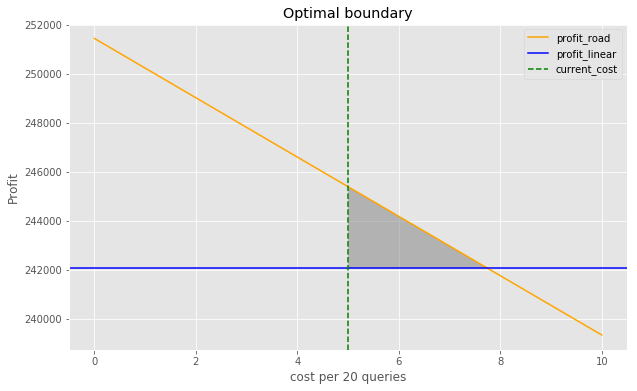

In [34]:
fig = plt.figure(figsize=(10,6))
costes = np.arange(12, step=2)
plt.plot(costes,profit_road-costes*trips_per_day/20, c='orange')
plt.axhline(y=profit_linear, color='b',label='profit_linear')
plt.axvline(x=5, color='g',label='profit_linear', ls='--')
plt.legend(['profit_road', 'profit_linear', 'current_cost'])
plt.xlabel('cost per 20 queries')
plt.ylabel('Profit')
plt.title('Optimal boundary')
plt.fill_between(np.arange(5, (profit_road-profit_linear)*20/trips_per_day, .1), profit_linear, profit_road-np.arange(5, (profit_road-profit_linear)*20/trips_per_day, .1)*trips_per_day/20, color='grey', alpha=.5)
plt.show()

As we can see the max price it would make sense to pay per query 20 queries is 7.73 units, so the **max profitable price we could afford per query is 0.3865 units (now we pay 0.25 units per query)**.

***How would you improve the experimental design? Would you collect any additional data?***

To improve the design of the experiment the first thing I would do is **increase the sample size**, collecting data from a full month, seeing if there is seasonality according to the day of the week.  
And I would add information about the user's most **recent destinations** and the **neighborhood** where the pick-up takes place, so we could create a user destination pattern and assign vehicles more efficiently.